In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [3]:
import sklearn.datasets as datasets

data = datasets.make_circles(n_samples=100, factor=0.5, noise=0.15, random_state=0)
x, y = data[0],data[1]

In [26]:
y[y==1].size

50

In [12]:
def log_loss(y):
    return np.log(y[y==1].size/y[y==0].size)

In [19]:
df=pd.DataFrame(x,columns=['x1','x2'])

In [21]:
df['y']=y

In [23]:
df['log_loss']=log_loss(df['y'])

In [24]:
df

,x1,x2,y,log_loss
0,-0.928306,-0.129529,0,0.0
1,0.127708,-0.394127,1,0.0
2,0.913933,0.146873,0,0.0
3,0.351464,0.182781,1,0.0
4,-0.601253,-0.019918,1,0.0
...,...,...,...,...
95,0.297100,-0.101438,1,0.0
96,-0.427333,0.289203,1,0.0
97,0.194511,0.422177,1,0.0
98,0.766421,-0.220507,0,0.0


In [27]:
def prob(logloss):
    return 1/(1+np.exp(logloss))

In [28]:
df['prob1']=prob(df['log_loss'])

In [29]:
df

,x1,x2,y,log_loss,prob1
0,-0.928306,-0.129529,0,0.0,0.5
1,0.127708,-0.394127,1,0.0,0.5
2,0.913933,0.146873,0,0.0,0.5
3,0.351464,0.182781,1,0.0,0.5
4,-0.601253,-0.019918,1,0.0,0.5
...,...,...,...,...,...
95,0.297100,-0.101438,1,0.0,0.5
96,-0.427333,0.289203,1,0.0,0.5
97,0.194511,0.422177,1,0.0,0.5
98,0.766421,-0.220507,0,0.0,0.5


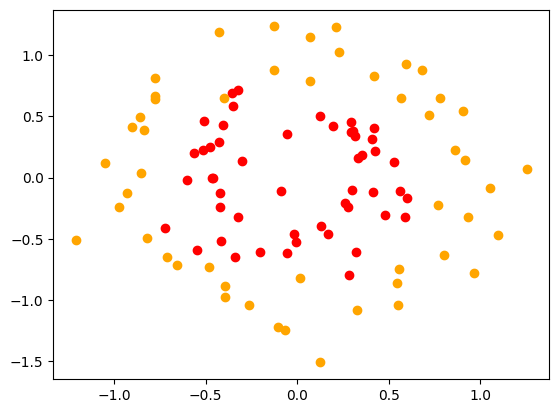

In [36]:
plt.scatter(df['x1'][y==1],df['x2'][y==1],color='red')
plt.scatter(df['x1'][y==0],df['x2'][y==0],color='orange')


In [38]:
df['res1']=df['y']-df['prob1']

In [39]:
df

,x1,x2,y,log_loss,prob1,res1
0,-0.928306,-0.129529,0,0.0,0.5,-0.5
1,0.127708,-0.394127,1,0.0,0.5,0.5
2,0.913933,0.146873,0,0.0,0.5,-0.5
3,0.351464,0.182781,1,0.0,0.5,0.5
4,-0.601253,-0.019918,1,0.0,0.5,0.5
...,...,...,...,...,...,...
95,0.297100,-0.101438,1,0.0,0.5,0.5
96,-0.427333,0.289203,1,0.0,0.5,0.5
97,0.194511,0.422177,1,0.0,0.5,0.5
98,0.766421,-0.220507,0,0.0,0.5,-0.5


In [37]:
dt1=DecisionTreeRegressor(max_depth=3)

In [40]:
dt1.fit(x,df['res1'])

DecisionTreeRegressor(max_depth=3)

In [41]:
dt1.predict(x)

array([-0.5       ,  0.31355932, -0.5       ,  0.31355932,  0.31355932,
        0.31355932,  0.31355932,  0.31355932,  0.31355932,  0.31355932,
        0.31355932,  0.31355932,  0.31355932,  0.31355932,  0.31355932,
       -0.5       , -0.5       , -0.5       , -0.42307692, -0.5       ,
       -0.5       ,  0.31355932, -0.5       ,  0.31355932, -0.5       ,
       -0.5       ,  0.31355932,  0.31355932,  0.31355932,  0.31355932,
        0.31355932,  0.31355932,  0.31355932,  0.31355932,  0.31355932,
       -0.5       , -0.5       ,  0.31355932,  0.31355932,  0.31355932,
       -0.5       ,  0.31355932, -0.42307692, -0.42307692, -0.5       ,
        0.31355932,  0.31355932, -0.42307692, -0.42307692, -0.5       ,
        0.31355932,  0.31355932, -0.5       , -0.42307692, -0.16666667,
        0.31355932,  0.31355932, -0.42307692, -0.5       ,  0.31355932,
        0.31355932, -0.16666667,  0.31355932,  0.31355932, -0.16666667,
        0.31355932, -0.42307692,  0.31355932,  0.31355932, -0.42

In [42]:
from sklearn.tree import plot_tree

[Text(0.625, 0.875, 'x[0] <= 0.64\nsquared_error = 0.25\nsamples = 100\nvalue = 0.0'),
 Text(0.5, 0.625, 'x[0] <= -0.63\nsquared_error = 0.244\nsamples = 87\nvalue = 0.075'),
 Text(0.25, 0.375, 'x[0] <= -0.75\nsquared_error = 0.062\nsamples = 15\nvalue = -0.433'),
 Text(0.125, 0.125, 'squared_error = 0.0\nsamples = 12\nvalue = -0.5'),
 Text(0.375, 0.125, 'squared_error = 0.222\nsamples = 3\nvalue = -0.167'),
 Text(0.75, 0.375, 'x[1] <= -0.691\nsquared_error = 0.217\nsamples = 72\nvalue = 0.181'),
 Text(0.625, 0.125, 'squared_error = 0.071\nsamples = 13\nvalue = -0.423'),
 Text(0.875, 0.125, 'squared_error = 0.152\nsamples = 59\nvalue = 0.314'),
 Text(0.75, 0.625, 'squared_error = 0.0\nsamples = 13\nvalue = -0.5')]

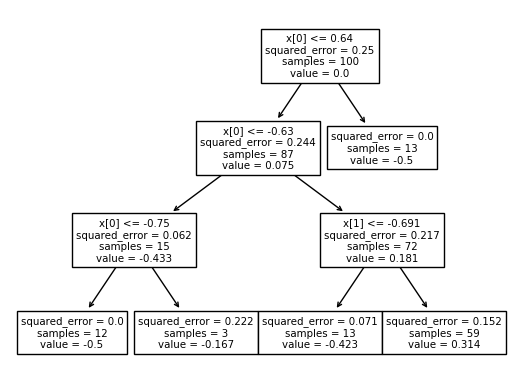

In [44]:
plot_tree(dt1)

In [ ]:
leaf_ids = dt1.apply(x)


(100,)

In [49]:
df['leaf']=leaf_ids

In [50]:
df

,x1,x2,y,log_loss,prob1,res1,leaf
0,-0.928306,-0.129529,0,0.0,0.5,-0.5,3
1,0.127708,-0.394127,1,0.0,0.5,0.5,7
2,0.913933,0.146873,0,0.0,0.5,-0.5,8
3,0.351464,0.182781,1,0.0,0.5,0.5,7
4,-0.601253,-0.019918,1,0.0,0.5,0.5,7
...,...,...,...,...,...,...,...
95,0.297100,-0.101438,1,0.0,0.5,0.5,7
96,-0.427333,0.289203,1,0.0,0.5,0.5,7
97,0.194511,0.422177,1,0.0,0.5,0.5,7
98,0.766421,-0.220507,0,0.0,0.5,-0.5,8


In [53]:
df['leaf'].unique()

array([3, 7, 8, 6, 4], dtype=int64)

In [57]:
def logloss(df):
    return df['res1']/(df['prob1']*(1-df['prob1']))

In [58]:
df['log_loss2']=logloss(df)

In [59]:
df

,x1,x2,y,log_loss,prob1,res1,leaf,log_loss2
0,-0.928306,-0.129529,0,0.0,0.5,-0.5,3,-2.0
1,0.127708,-0.394127,1,0.0,0.5,0.5,7,2.0
2,0.913933,0.146873,0,0.0,0.5,-0.5,8,-2.0
3,0.351464,0.182781,1,0.0,0.5,0.5,7,2.0
4,-0.601253,-0.019918,1,0.0,0.5,0.5,7,2.0
...,...,...,...,...,...,...,...,...
95,0.297100,-0.101438,1,0.0,0.5,0.5,7,2.0
96,-0.427333,0.289203,1,0.0,0.5,0.5,7,2.0
97,0.194511,0.422177,1,0.0,0.5,0.5,7,2.0
98,0.766421,-0.220507,0,0.0,0.5,-0.5,8,-2.0
